In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/Desktop/Project/dataset.csv')

df.fillna(df.mean(numeric_only=True), inplace=True)

import warnings
warnings.filterwarnings("ignore")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Desktop/Project/dataset.csv'

India: R^2 = 0.9987, MSE = 1.5014
Training Data - India:
Actual Values: [28355.763, 28098.682, 27645.749, 27228.667, 27029.549, 26890.1, 26848.279, 26598.911, 26342.016, 26026.697, 25739.527, 24899.418, 24828.119, 24783.025, 24253.964, 24168.443, 23583.089, 23138.532]
Predicted Values: [28355.925494559084, 28098.49395895327, 27645.786628011596, 27228.705679806968, 27029.51662038294, 26890.020887549457, 26848.29747008469, 26598.934717787895, 26342.02800491565, 26026.71561108466, 25739.44497882988, 24899.381965342247, 24828.23457160373, 24783.02259829452, 24253.944362370363, 24168.522865902516, 23583.000600858973, 23138.552983661542]

Test Data - India:
Actual Values: [23138.532, 23113.533, 23056.027]
Predicted Values: [23138.552983661542, 23115.65515109835, 23056.03959740756]

Forecast Data - India:
Forecasted Values: [23056.03959740756, 23054.330565690754, 22997.837110483488, 22976.484425880408, 22816.19313024582, 22775.06069159008, 22660.60777946601, 22547.09942318279, 22471.455682582

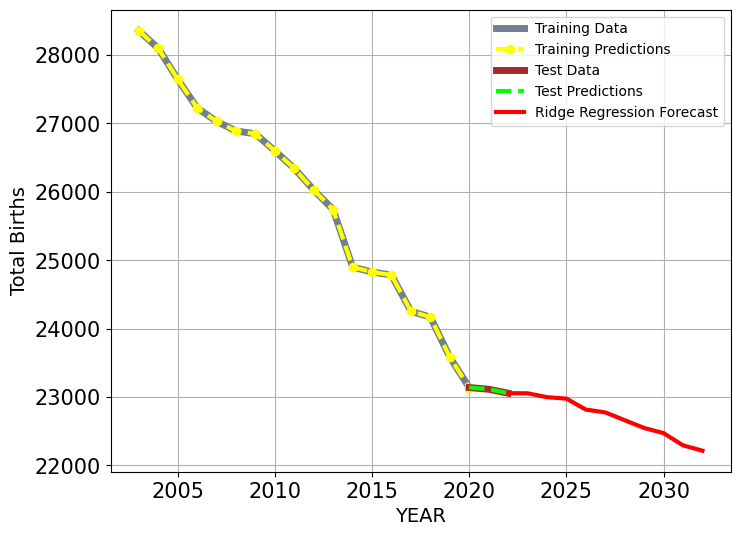

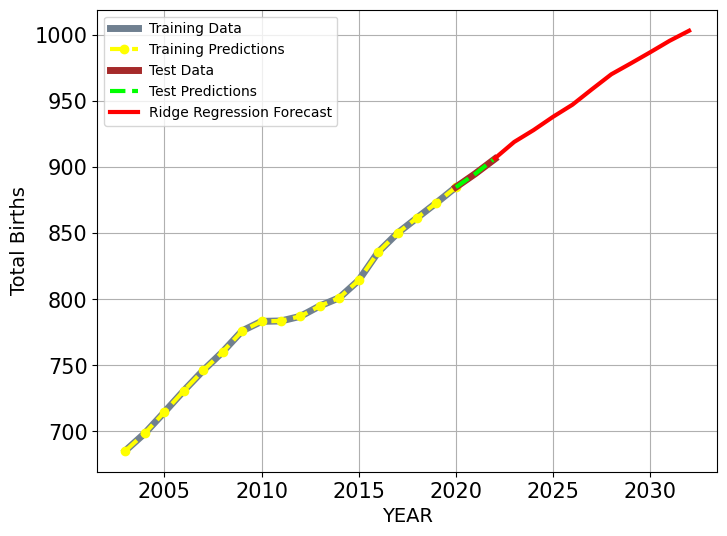

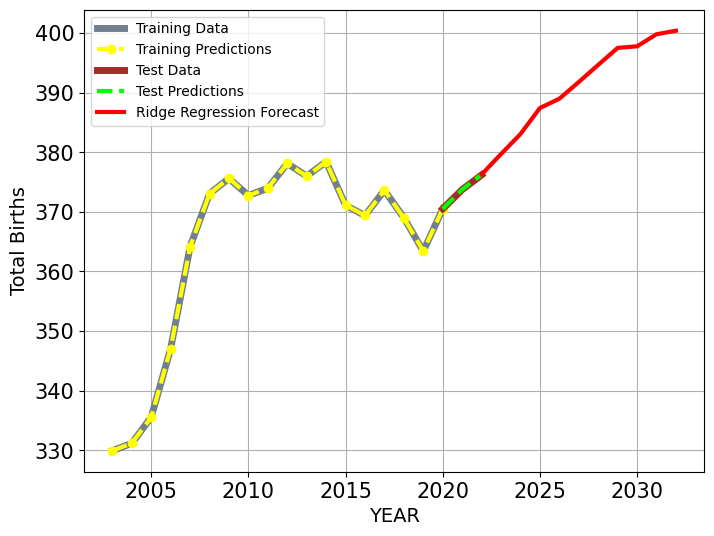

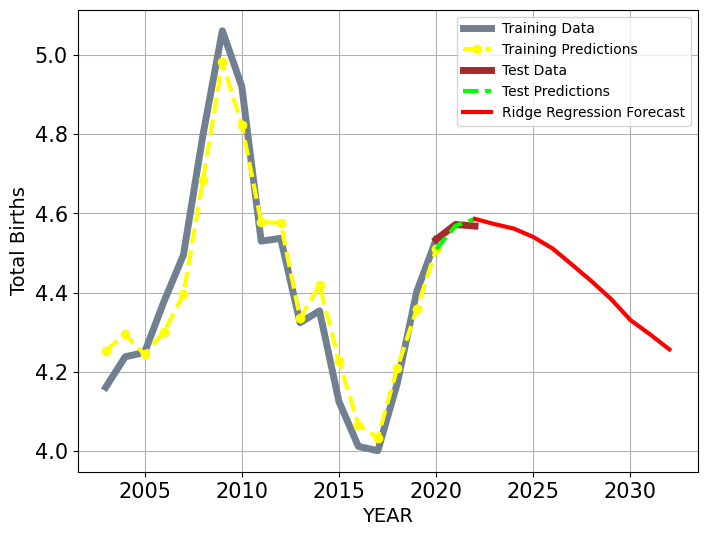

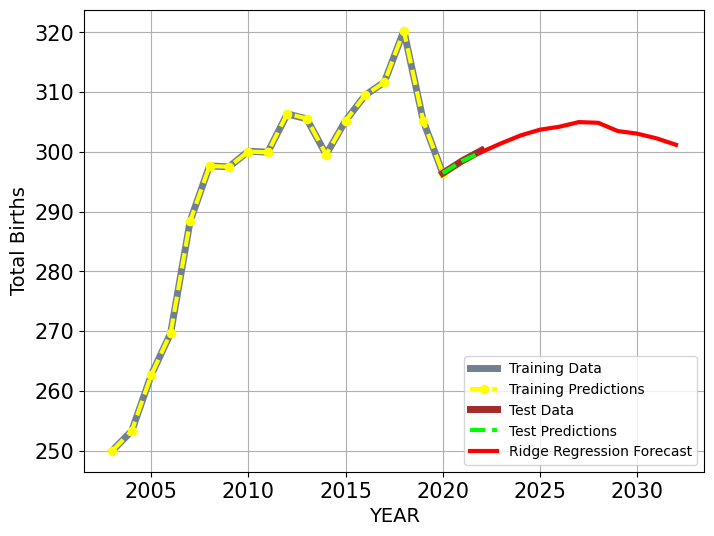

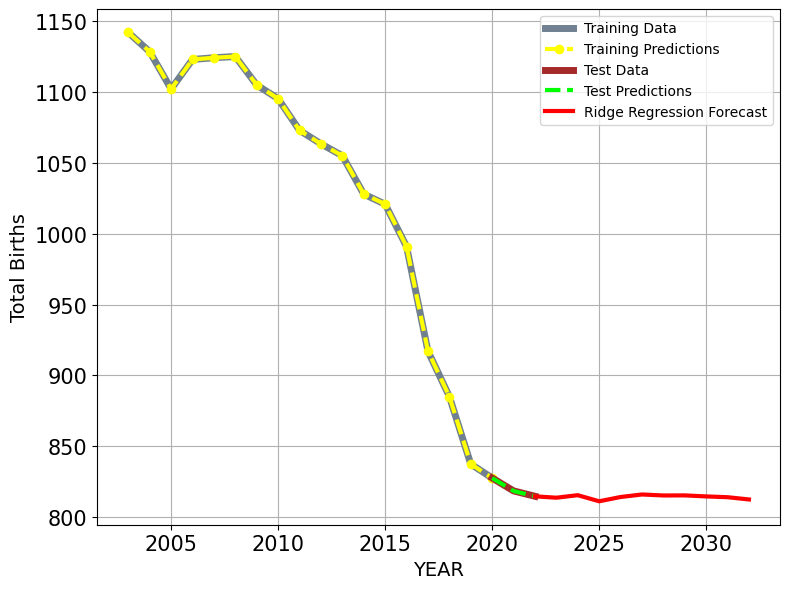

   Location  Time CBR_Prediction  Prediction of Total Deaths
0     India  2022            NaN                23056.039597
1     India  2023            NaN                23054.330566
2     India  2024            NaN                22997.837110
3     India  2025            NaN                22976.484426
4     India  2026            NaN                22816.193130
..      ...   ...            ...                         ...
61    Japan  2028            NaN                  815.269645
62    Japan  2029            NaN                  815.323637
63    Japan  2030            NaN                  814.598417
64    Japan  2031            NaN                  814.042233
65    Japan  2032            NaN                  812.452281

[66 rows x 4 columns]


In [2]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

countries_to_keep = ['India', 'Madagascar', 'Canada', 'Iceland', 'Australia', 'Japan']
df = df[df['Location'].isin(countries_to_keep)]

df_train = df[(df['Time'] >= 2003) & (df['Time'] <= 2020)]
df_test = df[(df['Time'] >= 2020) & (df['Time'] <= 2022)]
df_predict = df[(df['Time'] >= 2022) & (df['Time'] <= 2032)]

target_column = 'Births'

additional_features = ['LBsurvivingAge1', 'Births1519', 'TPopulation1Jan',  'Deaths', 
                       'NatChange', 'PopChange', 'InfantDeaths', 'Under5Deaths', 'NetMigrations']

predictions_df = pd.DataFrame(columns=['Location', 'Time', 'CBR_Prediction'])

for i, country in enumerate(countries_to_keep):
    fig, ax = plt.subplots(figsize=(8, 6))
    country_train_data = df_train[df_train['Location'] == country]
    country_test_data = df_test[df_test['Location'] == country]
    country_predict_data = df_predict[df_predict['Location'] == country]

    X_train = country_train_data[additional_features]
    y_train = country_train_data[target_column]

    X_test = country_test_data[additional_features]
    y_test = country_test_data[target_column]

    X_predict = country_predict_data[additional_features]
    
    model = Ridge(alpha=1.0) 
    model.fit(X_train, y_train)
    
    forecast_values = model.predict(X_predict)
    
    r2 = r2_score(y_test, model.predict(X_test))
    mse = mean_squared_error(y_test, model.predict(X_test))
    
    print(f"{country}: R^2 = {r2:.4f}, MSE = {mse:.4f}")
    
    train_predictions = model.predict(X_train)
    print(f"Training Data - {country}:\nActual Values: {list(y_train)}\nPredicted Values: {list(train_predictions)}\n")
   
    test_predictions = model.predict(X_test)
    print(f"Test Data - {country}:\nActual Values: {list(y_test)}\nPredicted Values: {list(test_predictions)}\n")
    
    ax.plot(country_train_data['Time'], y_train, label='Training Data',linewidth=5,  color='slategrey')
    ax.plot(country_train_data['Time'], train_predictions, label='Training Predictions',linewidth=3, linestyle='--', color='yellow',marker='o')


    ax.plot(country_test_data['Time'], y_test, label='Test Data',linewidth=5,  color='brown')
    ax.plot(country_test_data['Time'], test_predictions, label='Test Predictions', linestyle='--',linewidth=3, color='lime')
    ax.plot(country_predict_data['Time'], forecast_values, label='Ridge Regression Forecast',linewidth=3, color='red')
    
    
    ax.set_xlabel('YEAR', fontsize=14)
    ax.set_ylabel('Total Births', fontsize=14)
    ax.legend()
    ax.grid()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)

    print(f"Forecast Data - {country}:\nForecasted Values: {list(forecast_values)}\n")

    country_predictions = pd.DataFrame({
        'Location': [country] * len(country_predict_data),
        'Time': country_predict_data['Time'],
        'Prediction of Total Deaths': forecast_values
    })

    predictions_df = pd.concat([predictions_df, country_predictions], ignore_index=True)

plt.tight_layout()
plt.show()

print(predictions_df)
